## Import Data ##

In [254]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import *
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

device = "mps" if torch.mps.is_available() else "cpu"
print(device)

mps


In [306]:
files = os.listdir()
data = [f for f in files if f.endswith(".csv")]

if data:
    df = pd.read_csv(data[0])
else:
    print("No data files found in the directory.")

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [309]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [311]:
#Standardize data, helpful for linear regression and Neural Networks

copy_df = df.copy()

for column in copy_df.columns:
    copy_df[column] = copy_df[column]/copy_df[column].abs().max()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.0
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.0
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0.0
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.0
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.000030,0.0
284803,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.000965,0.0
284804,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.002642,0.0
284805,0.999977,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.000389,0.0


In [313]:
def drop():
    global X
    global y
    
    X = copy_df.drop(columns=["Class"])
    y = copy_df["Class"]

drop()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0.0
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0.0
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0.0
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0.0
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.000030,0.0
284803,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.000965,0.0
284804,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.002642,0.0
284805,0.999977,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.000389,0.0


## Data Clean Up ##

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

   feature        VIF
0     Time   2.339084
1       V1   1.621694
2       V2   3.869377
3       V3   1.255585
4       V4   1.137944
5       V5   2.753075
6       V6   1.522122
7       V7   2.510165
8       V8   1.097151
9       V9   1.018831
10     V10   1.115668
11     V11   1.028861
12     V12   1.011961
13     V13   1.003434
14     V14   1.026832
15     V15   1.014135
16     V16   1.000371
17     V17   1.004772
18     V18   1.006568
19     V19   1.037809
20     V20   2.233934
21     V21   1.100720
22     V22   1.082384
23     V23   1.149268
24     V24   1.000659
25     V25   1.013388
26     V26   1.000487
27     V27   1.008979
28     V28   1.001425
29  Amount  11.499791


In [315]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

copy_df = copy_df.copy()

copy_df["pca"] = pca.fit_transform(copy_df[["Amount"]])

copy_df = copy_df.drop(["Amount"], axis=1)
drop()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,pca
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.0,0.002385
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.0,-0.003334
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.0,0.011300
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.0,0.001368
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.0,-0.000715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.0,-0.003409
284803,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.0,-0.002474
284804,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.0,-0.000797
284805,0.999977,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.0,-0.003050


In [222]:
copy_df.isna().sum()

Time     0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
pca      0
dtype: int64

In [68]:
copy_df = copy_df.dropna() #drop rows with missing values

In [266]:
copy_df.duplicated().sum()

1081

In [317]:
copy_df = copy_df.drop_duplicates() #drop duplicate rows

In [319]:
drop()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,pca
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.0,0.002385
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.0,-0.003334
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.0,0.011300
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.0,0.001368
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.0,-0.000715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.0,-0.003409
284803,0.999971,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.0,-0.002474
284804,0.999977,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.0,-0.000797
284805,0.999977,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.0,-0.003050


## Statistical Modeling ##

In [230]:
copy_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,pca
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.548701,0.000105,-0.000057,0.000033,-0.000176,0.000016,-0.000016,0.000015,-0.000012,-0.000102,...,-0.000011,-0.000001,0.000004,0.000047,-0.000023,0.000042,0.000056,0.000016,0.001667,0.000005
std,0.274787,0.034535,0.022646,0.031219,0.083802,0.012106,0.018171,0.010181,0.016104,0.070246,...,0.020784,0.066271,0.013920,0.132102,0.050627,0.137050,0.012519,0.009691,0.040796,0.009747
min,0.000000,-1.000000,-1.000000,-1.000000,-0.336774,-1.000000,-0.356888,-0.361203,-1.000000,-0.861434,...,-1.000000,-1.000000,-1.000000,-0.618736,-1.000000,-0.740488,-0.713828,-0.455867,0.000000,-0.003439
25%,0.313699,-0.016238,-0.008256,-0.018410,-0.050377,-0.006065,-0.010491,-0.004582,-0.002852,-0.041309,...,-0.006555,-0.049638,-0.003609,-0.077315,-0.030838,-0.092901,-0.002235,-0.001560,0.000000,-0.003221
50%,0.490141,0.000361,0.000879,0.003724,-0.001318,-0.000470,-0.003754,0.000339,0.000299,-0.003373,...,-0.000845,0.000611,-0.000249,0.008947,0.001581,-0.014833,0.000047,0.000333,0.000000,-0.002583
75%,0.806160,0.023331,0.011006,0.021251,0.043830,0.005382,0.005413,0.004731,0.004448,0.038216,...,0.005346,0.048316,0.003297,0.095917,0.034061,0.068308,0.002885,0.002313,0.000000,-0.000422
max,1.000000,0.043521,0.303342,0.194153,1.000000,0.305967,1.000000,1.000000,0.273260,1.000000,...,0.781009,0.960665,0.502780,1.000000,0.730384,1.000000,1.000000,1.000000,1.000000,0.996561


In [232]:
copy_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,pca
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.012359,-0.010559
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.094486,-0.230105
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,0.084624,-0.533428
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.182322,-0.212410
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.129326,0.099514
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.087812,-0.387685
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,-0.043915,0.216389
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,-0.172347,0.400408
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,0.033068,-0.104662
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.094021,-0.044123


In [234]:
kstest(X, "norm").pvalue #p-value for each row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

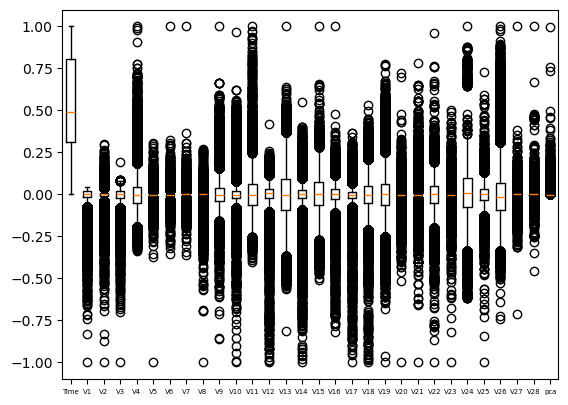

In [236]:
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

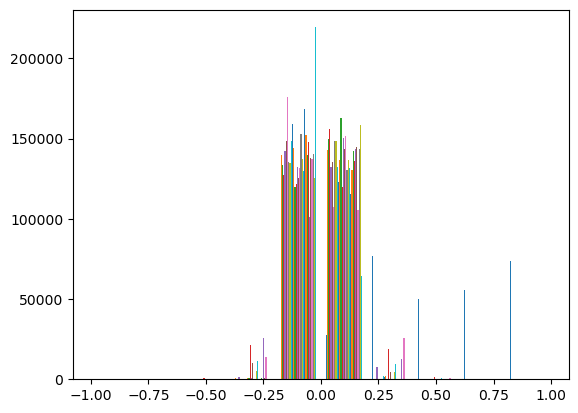

In [238]:
plt.hist(X)
plt.show()

## Data Optimization ##

In [474]:
#Linear Algebra Operations
d = copy_df[~copy_df["Class"].map(lambda x: isinstance(x, list)) & (copy_df["Class"] != 0)]
copy_df = copy_df[~((copy_df['Class'] != 0) & copy_df['Class'].map(lambda x: not isinstance(x, list)))]
vec_df = np.dot(d, 1.5) #Operations to weight data

#re-inserting weighted data back into the dataset
v = pd.DataFrame(vec_df, columns = copy_df.columns[0:31])
copy_df = pd.concat([copy_df, v])

In [ ]:
#Linear Algebra Operations
d = copy_df[~copy_df["Class"].map(lambda x: isinstance(x, list)) & (copy_df["Class"] != 0)]
copy_df = copy_df[~((copy_df['Class'] != 0) & copy_df['Class'].map(lambda x: not isinstance(x, list)))]
vec_df = np.dot(d, 1/1.5) #Operations to weight data

#re-inserting weighted data back into the dataset
v = pd.DataFrame(vec_df, columns = copy_df.columns[0:31])
copy_df = pd.concat([copy_df, v])

In [476]:
drop()
copy_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,pca
0,0.000000,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.0,0.002385
1,0.000000,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.0,-0.003334
2,0.000006,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.0,0.011300
3,0.000006,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.0,0.001368
4,0.000012,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.0,-0.000715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,1.468315,-0.051267,0.023220,-0.140247,0.155489,-0.020658,-0.041142,-0.010982,0.014284,-0.198616,...,0.033530,-0.043792,0.021405,-0.096482,0.078312,0.336217,0.013888,0.006557,1.5,0.017612
469,1.470094,0.036659,0.026598,-0.155329,0.125495,0.005837,-0.027145,-0.017578,0.005092,-0.108438,...,0.015961,0.003874,-0.004876,-0.026518,0.076035,0.315352,0.018465,0.008271,1.5,-0.005114
470,1.470129,-0.017980,0.023235,-0.068712,0.041627,-0.014777,-0.000068,-0.027798,0.024793,-0.062736,...,0.032378,0.114437,0.006392,0.010493,-0.107771,0.200909,0.018273,0.008613,1.5,-0.000611
471,1.475468,-0.082804,0.012085,-0.167605,0.161516,-0.011086,-0.060235,-0.027465,0.021690,-0.157006,...,0.025119,-0.036935,-0.015269,-0.060091,-0.047813,0.258483,0.041987,-0.011243,1.5,0.009146


## Training Model ##

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [504]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [506]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(198608, 30)
(42559, 30)
(42559, 30)


In [508]:
class dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.array(X), dtype = torch.float32).to(device)
        self.y = torch.tensor(np.array(y), dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [510]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [512]:
train_dataloader = DataLoader(training_data, batch_size = 16, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 16, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 16, shuffle = True)

In [514]:
Hidden_Neurons = 100

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], Hidden_Neurons)
        
        self.hidden_layer1 = nn.Linear(X.shape[1], Hidden_Neurons)
        self.hidden_layer2 = nn.Linear(Hidden_Neurons, Hidden_Neurons)
        self.hidden_layer3 = nn.Linear(Hidden_Neurons, Hidden_Neurons)
        
        self.linear = nn.Linear(Hidden_Neurons, 1) #output layer
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        #Forward Propagation
        x = x.to(device)
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [516]:
summary(model, (X.shape[1],), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1]                       23,300
├─Linear: 1-1                            [100]                     3,100
├─Linear: 1-2                            [1]                       101
├─Sigmoid: 1-3                           [1]                       --
Total params: 26,501
Trainable params: 26,501
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.31
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

In [518]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-4)

In [520]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        #Back Propagation
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)
        
            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc
        
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    
    total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100, 4))

    print(f'''Epoch no. {epoch+1} 
    Training Loss: {round(total_loss_train/1000, 4)} 
    Training Accuracy: {round(total_acc_train/training_data.__len__()*100, 4)} 
    Validation Loss: {round(total_loss_val/1000, 4)} 
    Validation Accuracy: {round(total_acc_val/validation_data.__len__()*100, 4)}''')

    print("="*50)

Epoch no. 1 
    Training Loss: 0.4265 
    Training Accuracy: 99.8077 
    Validation Loss: -0.0398 
    Validation Accuracy: 99.8144
Epoch no. 2 
    Training Loss: -0.2825 
    Training Accuracy: 99.8117 
    Validation Loss: -0.0565 
    Validation Accuracy: 99.8073
Epoch no. 3 
    Training Loss: -0.4362 
    Training Accuracy: 99.7976 
    Validation Loss: -0.0799 
    Validation Accuracy: 99.7956
Epoch no. 4 
    Training Loss: -0.4893 
    Training Accuracy: 99.79 
    Validation Loss: -0.0858 
    Validation Accuracy: 99.7932
Epoch no. 5 
    Training Loss: -0.5292 
    Training Accuracy: 99.791 
    Validation Loss: -0.099 
    Validation Accuracy: 99.7909
Epoch no. 6 
    Training Loss: -0.5726 
    Training Accuracy: 99.79 
    Validation Loss: -0.0993 
    Validation Accuracy: 99.7909
Epoch no. 7 
    Training Loss: -0.5711 
    Training Accuracy: 99.7915 
    Validation Loss: -0.0994 
    Validation Accuracy: 99.7909
Epoch no. 8 
    Training Loss: -0.5773 
    Training A

In [523]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for inputs, labels in testing_dataloader:
        inputs, labels = data
        prediction = model(inputs).squeeze(1)

        batch_loss_test = criterion(prediction, labels).item()
        total_loss_test += batch_loss_test
        
        acc = (prediction.round() == labels).sum().item()
        
        total_acc_test += acc
        total_loss_test += batch_loss_test

print(f'''Accuracy Score: {round(total_acc_test/testing_data.__len__()*100, 4)} 
Loss: {round(total_loss_test/1000, 4)}''')

Accuracy Score: 93.7522 
Loss: 0.0006


## Post-Training Analysis ##

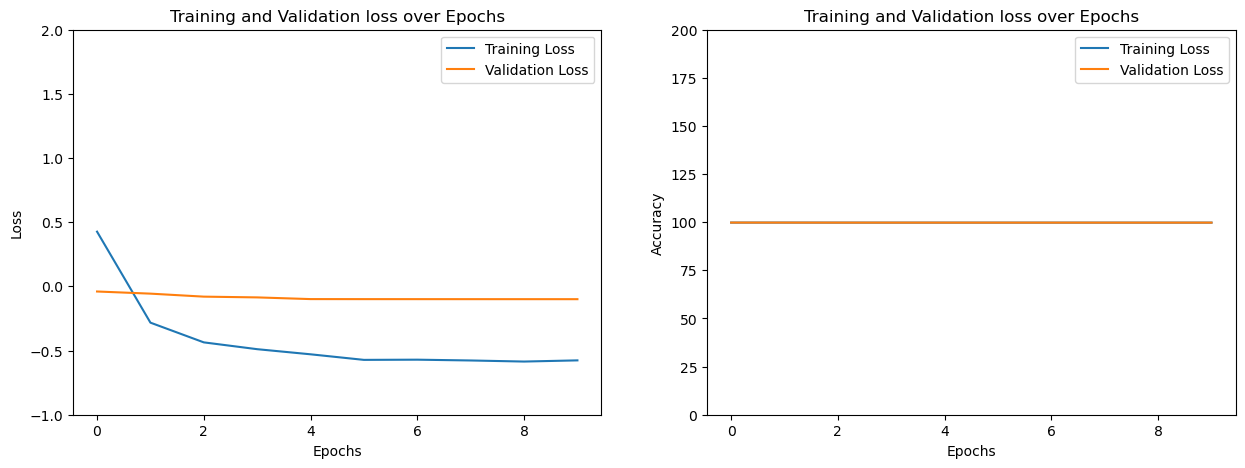

In [533]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation loss over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([-1,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = "Training Loss")
axs[1].plot(total_acc_validation_plot, label = "Validation Loss")
axs[1].set_title("Training and Validation loss over Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,200])
axs[1].legend()

plt.show()

In [535]:
torch.save(model.state_dict(), "Tankz_v2.pth")

In [537]:
loaded_model = MyModel().to(device)
loaded_model.load_state_dict(torch.load("Tankz_v2.pth"))
loaded_model.eval()

MyModel(
  (input_layer): Linear(in_features=30, out_features=100, bias=True)
  (hidden_layer1): Linear(in_features=30, out_features=100, bias=True)
  (hidden_layer2): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer3): Linear(in_features=100, out_features=100, bias=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)